# Assignment: Exploration on International Tourism

---

## 1.Abstract

This report is an exploration on tourism of different countries. Tourism may be affected by different aspects such as personal income, GDP and so on. I try to find the relationship between different aspects and answer some key research questions. Finally I use regression and KDD model to perform predictive modeling between tourism receipts and expenditures. The outcome is that there is a strong liner relationship between the two aspects.

## 2.Introduction
Economic globalization is becoming more and more important. People are more likely to travel abroad. It is significant to analysis the international tourism. 

## 3.Data Acquisition
The data is came from http://data.worldbank.org/. There are plenty of indicators to choose. From my point of view, the development of tourism can be analysis from the receipts and arrivals. Besides, the departures and expenditures of tourism can tell us if it is popular to have international trip. Tourism can also be affected by some financial indicators such as GDP.

### 3.1 Choose	Indicators
Here are the indicators to choose from the website. The url is like http://api.worldbank.org/countries/all/indicators/NY.GNP.PCAP.CD?date=2010:2016&format=json. The code "NY.GNP.PCAP.CD" in the url represent "GNI per capita" which can be changed for other indicators. I show codes of different indicators below.

GDP at market prices (current US$):NY.GDP.MKTP.CD

International tourism, number of arrivals:ST.INT.ARVL

International tourism, number of departures:ST.INT.DPRT

International tourism, expenditures (current US$):ST.INT.XPND.CD

International tourism, receipts (current US$):ST.INT.RCPT.CD

Software environment

In [1]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unirest

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_columns',0)
pd.set_option('max_rows',1000)

In [3]:
#we first need to make some extra imports
import json
from time import sleep
from datetime import datetime

#you might need to set the proxies if you are doiung this from Massey's domain
#if the below does not work, then try this: "http://get-proxy.massey.ac.nz/"
massey_proxies = {
  "http": "http://alb-cache1.massey.ac.nz/",
 "https": "http://alb-cache1.massey.ac.nz/",
}

At first I create a function to return the url of different indicators.

In [4]:
def get_url(indicator):
    return "http://api.worldbank.org/countries/all/indicators/"+indicator+"?date=1995:2016&format=json&per_page=5208"

get_url("NY.GDP.MKTP.CD")

'http://api.worldbank.org/countries/all/indicators/NY.GDP.MKTP.CD?date=1995:2016&format=json&per_page=5208'

This is the function to return the data

In [5]:
def get_data(indicator):
    url=get_url(indicator)
    response = requests.get(url)
    response_json=response.content
    result = json.loads(response_json)
    return result[1]

get_data("NY.GDP.MKTP.CD")

[{u'country': {u'id': u'1A', u'value': u'Arab World'},
  u'date': u'2015',
  u'decimal': u'0',
  u'indicator': {u'id': u'NY.GDP.MKTP.CD',
   u'value': u'GDP at market prices (current US$)'},
  u'value': None},
 {u'country': {u'id': u'1A', u'value': u'Arab World'},
  u'date': u'2014',
  u'decimal': u'0',
  u'indicator': {u'id': u'NY.GDP.MKTP.CD',
   u'value': u'GDP at market prices (current US$)'},
  u'value': u'2869034798597.43'},
 {u'country': {u'id': u'1A', u'value': u'Arab World'},
  u'date': u'2013',
  u'decimal': u'0',
  u'indicator': {u'id': u'NY.GDP.MKTP.CD',
   u'value': u'GDP at market prices (current US$)'},
  u'value': u'2841980984068.92'},
 {u'country': {u'id': u'1A', u'value': u'Arab World'},
  u'date': u'2012',
  u'decimal': u'0',
  u'indicator': {u'id': u'NY.GDP.MKTP.CD',
   u'value': u'GDP at market prices (current US$)'},
  u'value': u'2767864431825.96'},
 {u'country': {u'id': u'1A', u'value': u'Arab World'},
  u'date': u'2011',
  u'decimal': u'0',
  u'indicator': {u'i

This step is to generate the dataframes, It is quite slow, please wait.

In [6]:
GDP_DATA=pd.DataFrame(get_data("NY.GDP.MKTP.CD"))
INT_ARVL_DATA=pd.DataFrame(get_data("ST.INT.ARVL"))
INT_DPRT_DATA=pd.DataFrame(get_data("ST.INT.DPRT"))
INT_XPND_DATA=pd.DataFrame(get_data("ST.INT.XPND.CD"))
INT_RCPT_DATA=pd.DataFrame(get_data("ST.INT.RCPT.CD"))
GDP_DATA.head()

,country,date,decimal,indicator,value
0,"{u'id': u'1A', u'value': u'Arab World'}",2015,0,"{u'id': u'NY.GDP.MKTP.CD', u'value': u'GDP at ...",None
1,"{u'id': u'1A', u'value': u'Arab World'}",2014,0,"{u'id': u'NY.GDP.MKTP.CD', u'value': u'GDP at ...",2869034798597.43
2,"{u'id': u'1A', u'value': u'Arab World'}",2013,0,"{u'id': u'NY.GDP.MKTP.CD', u'value': u'GDP at ...",2841980984068.92
3,"{u'id': u'1A', u'value': u'Arab World'}",2012,0,"{u'id': u'NY.GDP.MKTP.CD', u'value': u'GDP at ...",2767864431825.96
4,"{u'id': u'1A', u'value': u'Arab World'}",2011,0,"{u'id': u'NY.GDP.MKTP.CD', u'value': u'GDP at ...",2493427718250.87


## 4.Data Wrangling

There are 4 steps to deal with data Wrangling.

1.Delete some columns in the dataframe. Some columns are not needed such as the "decimal" column.

2.Rename the names of some columns in different dataframe. I need to do it because the column names in different dataframes are nearly same. To distinguish them easily, I will rename them by their meaning.

3.Change the dictionary type. Some of the data are dictionary type, I need to transfer them to proper ones.

4.Fill missing data. Some of the data are missing, I need to handle with them.

### 4.1 delete columns

I need to delete the "decimal" and "indicator" column.

In [7]:
data_group=[GDP_DATA,INT_ARVL_DATA,INT_DPRT_DATA,INT_XPND_DATA,INT_RCPT_DATA]

for i in data_group:
    del i['decimal']
    del i['indicator']


In [8]:
GDP_DATA.head()

,country,date,value
0,"{u'id': u'1A', u'value': u'Arab World'}",2015,None
1,"{u'id': u'1A', u'value': u'Arab World'}",2014,2869034798597.43
2,"{u'id': u'1A', u'value': u'Arab World'}",2013,2841980984068.92
3,"{u'id': u'1A', u'value': u'Arab World'}",2012,2767864431825.96
4,"{u'id': u'1A', u'value': u'Arab World'}",2011,2493427718250.87


### 4.2 rename columns

rename the "value" column.

In [9]:
GDP_DATA.rename(columns={"value":"GDP"},inplace=True)
INT_ARVL_DATA.rename(columns={"value":"INT_ARVL"},inplace=True)
INT_DPRT_DATA.rename(columns={"value":"INT_DPRT"},inplace=True)
INT_XPND_DATA.rename(columns={"value":"INT_XPND"},inplace=True)
INT_RCPT_DATA.rename(columns={"value":"INT_RCPT"},inplace=True)
GDP_DATA.head()

,country,date,GDP
0,"{u'id': u'1A', u'value': u'Arab World'}",2015,None
1,"{u'id': u'1A', u'value': u'Arab World'}",2014,2869034798597.43
2,"{u'id': u'1A', u'value': u'Arab World'}",2013,2841980984068.92
3,"{u'id': u'1A', u'value': u'Arab World'}",2012,2767864431825.96
4,"{u'id': u'1A', u'value': u'Arab World'}",2011,2493427718250.87


### 4.3 Change Dictionary Type

This function is to find "value" in the "country" dictionary.

In [10]:
def get_country_name(x):
    return x['value']

In [11]:
for df in data_group:
    df['country']=df['country'].apply(get_country_name)
    
GDP_DATA.head()

,country,date,GDP
0,Arab World,2015,None
1,Arab World,2014,2869034798597.43
2,Arab World,2013,2841980984068.92
3,Arab World,2012,2767864431825.96
4,Arab World,2011,2493427718250.87


### 4.4 Fill missing data.

There are some missing data in the dataframe .Using bfill() to fill missing data.

In [12]:
for df in data_group:
    df.ix[:,2]=df[[0,2]].groupby('country').bfill()
    
INT_DPRT_DATA.head(5)

,country,date,INT_DPRT
0,Arab World,2015,NaN
1,Arab World,2014,NaN
2,Arab World,2013,NaN
3,Arab World,2012,NaN
4,Arab World,2011,NaN


Some of the data can not be filled by bfill(), I will use fillna() to fill the Data Frame for further analysis.

In [13]:
for df in data_group:
    df.fillna(0,inplace=True)
    
INT_DPRT_DATA.head(5)

,country,date,INT_DPRT
0,Arab World,2015,0
1,Arab World,2014,0
2,Arab World,2013,0
3,Arab World,2012,0
4,Arab World,2011,0


## 5.Data Integration

Use merge() and for loop to integrate data into one dataset.

In [14]:
for i in range(len(data_group)-1):
    df=pd.merge(df,data_group[i])

df.head()

,country,date,INT_RCPT,GDP,INT_ARVL,INT_DPRT,INT_XPND
0,Arab World,2015,73907971408.8914,2869034798597.43,99447200.2545448,0,90253417643.9433
1,Arab World,2014,73907971408.8914,2869034798597.43,99447200.2545448,0,90253417643.9433
2,Arab World,2013,66283548535.4848,2841980984068.92,92994742.8545598,0,77727368563.8134
3,Arab World,2012,67883970508.19,2767864431825.96,93428841.8108198,0,74190320657.6144
4,Arab World,2011,61421270600.9769,2493427718250.87,83806550.6142428,0,67640271950.8684


Transfer data to number

In [15]:
for i in range(2,7):
    df.ix[:,i]=pd.to_numeric(df.ix[:,i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5208 entries, 0 to 5207
Data columns (total 7 columns):
country     5208 non-null object
date        5208 non-null object
INT_RCPT    5208 non-null float64
GDP         5208 non-null float64
INT_ARVL    5208 non-null float64
INT_DPRT    5208 non-null float64
INT_XPND    5208 non-null float64
dtypes: float64(5), object(2)
memory usage: 325.5+ KB


Transfer date to time format, and set DatetimeIndex

In [16]:
df['date']=pd.to_datetime(df['date'], format='%Y')
df.index=df['date']
df=df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5208 entries, 1995-01-01 to 2015-01-01
Data columns (total 7 columns):
country     5208 non-null object
date        5208 non-null datetime64[ns]
INT_RCPT    5208 non-null float64
GDP         5208 non-null float64
INT_ARVL    5208 non-null float64
INT_DPRT    5208 non-null float64
INT_XPND    5208 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 325.5+ KB


## 6.Data Analysis

### 6.1 Steps of Data Analysis

There are 4 steps in data Analysis

1.Choose countries to analysis. There are too many countries in the dataset，I will choose countries which is famous of tourism.

2.the relationship between GDP and the number of departures.

3.Discuss about number of visitors.

4.the relationship among GDP,expenditures and receipts.

Software Environment

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [18]:
rcParams['figure.figsize'] = 15,10
rcParams['font.size'] = 30
rcParams['legend.fontsize'] = 20
rcParams['axes.labelsize']=20
rcParams['xtick.labelsize']=15
rcParams['ytick.labelsize']=15
pd.set_option('max_columns',0)

### 6.2 Choose Countries to Analysis

I will choose 10 countries from top 50 of International Tourism Receipts. Here is the progress to order the data.

In [19]:
df[['INT_RCPT']].groupby(df['country']).mean().sort_values('INT_RCPT',ascending=False).head()

,INT_RCPT
country,
World,875370122235.06
High income,669998525279.33
OECD members,589899005857.14
High income: OECD,559284196333.33
Europe & Central Asia (all income levels),398996428804.22


I choose the data by manual selecting .The countries I choose are in the list below.

In [20]:
country_list=["United States","France","United Kingdom","China","Australia","Malaysia","Korea, Rep.","Japan","India","New Zealand"]

In [21]:
country_data=df.query('country in["United States","France","United Kingdom","China","Australia","Malaysia","Korea, Rep.","Japan","India","New Zealand"]')
country_data.head()

,country,date,INT_RCPT,GDP,INT_ARVL,INT_DPRT,INT_XPND
date,,,,,,,
1995-01-01,China,1995-01-01,8730000000.00,732032045217.77,20034000.00,4520000.00,3688000000.00
1995-01-01,France,1995-01-01,31295000000.00,1609892232882.11,60033000.00,18686000.00,20699000000.00
1995-01-01,India,1995-01-01,2582000000.00,366600193391.35,2124000.00,3056000.00,996000000.00
1995-01-01,Australia,1995-01-01,11915000000.00,367949212949.21,3726000.00,2519000.00,7260000000.00
1995-01-01,Japan,1995-01-01,4894000000.00,5333925511058.95,3345000.00,15298000.00,46966000000.00


### 6.3 the relationship between GDP and the Number of Departures.

questions:

1.People in which country have the largest population to travel abroad.

2.Does the country have the largest GDP?

3.Other findings.

A function to draw line chart by country and indicator

In [22]:
def plot_line_chart(country,indicator):
    return country_data[["country",indicator]].query('country=="'+country+'"').plot()

A function to draw bar chart. The bar chart contains data of 10 countries. Average annual data is showed on the figure.

In [23]:
def plot_bar_chart(indicator):
    return country_data[[indicator]].groupby(country_data['country']).mean().plot(kind='bar')

Bar chart of Number of Departures.

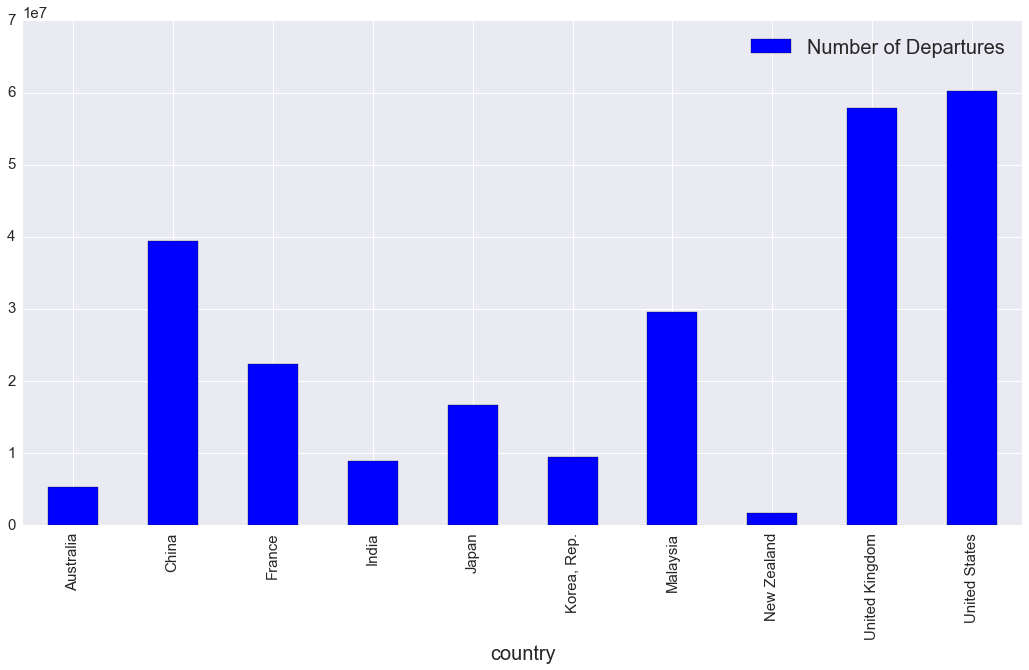

In [24]:
_=plot_bar_chart("INT_DPRT")
plt.legend().get_texts()[0].set_text('Number of Departures')
plt.tight_layout()

The diagram shows that US has the largest population of departures.Besides, the second largest population is hold by UK. However, the population in China is only two thirds of that in US, which surprises me.

Bar chart of GDP.

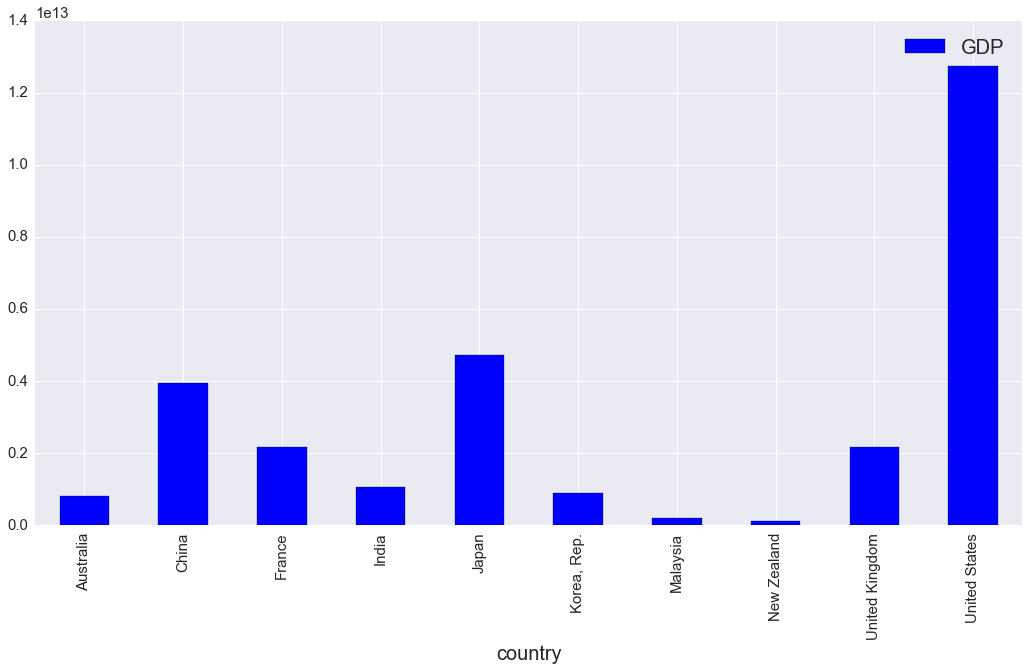

In [25]:
_=plot_bar_chart("GDP")
plt.tight_layout()

It is obvious that United States has the most significant GDP in the world which is more than twice of that in Japan, which is the second largest one.

Other findings:

It is interesting that UK has the second largest population of Departures while the number of GDP is only rank 5 among the selected countries. It is not easy to find the reason. Maybe because people in different culture have different opinion on expenditure.

### 6.4 Discuss about Number of Visitors.

questions:

1.Which country is the most popular one to travel.

2.How did the number of visitors in the country experienced during the 20 years.

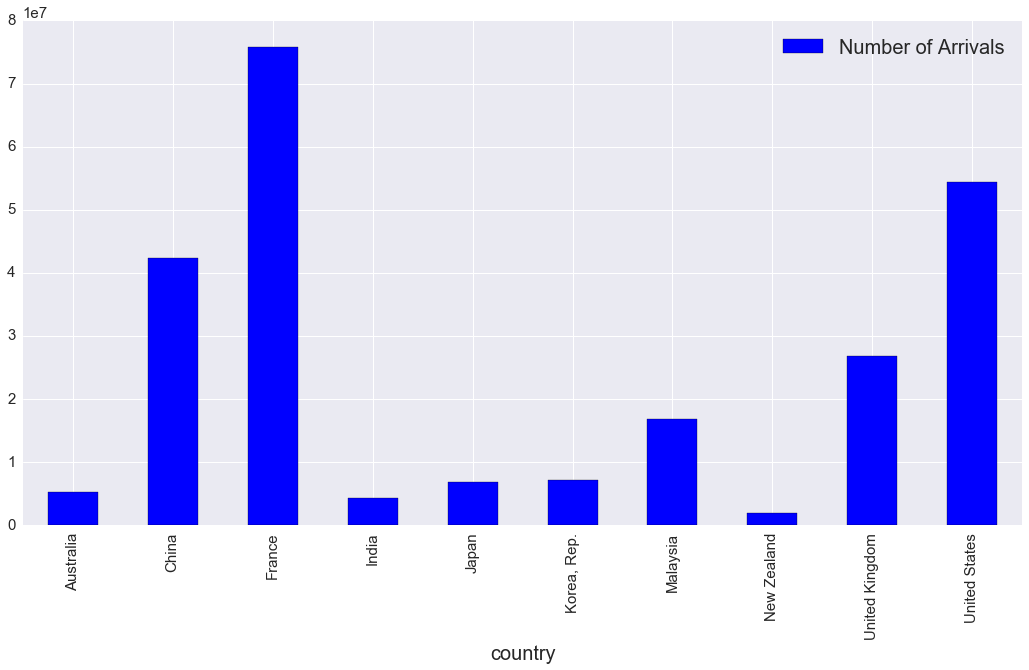

In [26]:
_=plot_bar_chart("INT_ARVL")
plt.legend().get_texts()[0].set_text('Number of Arrivals')
plt.tight_layout()

The bar graph tells us that France is the most popular country for traveling, the arrivals of which is about 30 percent more than that of United States. Let's see how does the arrivals change in France during the 20 years period.

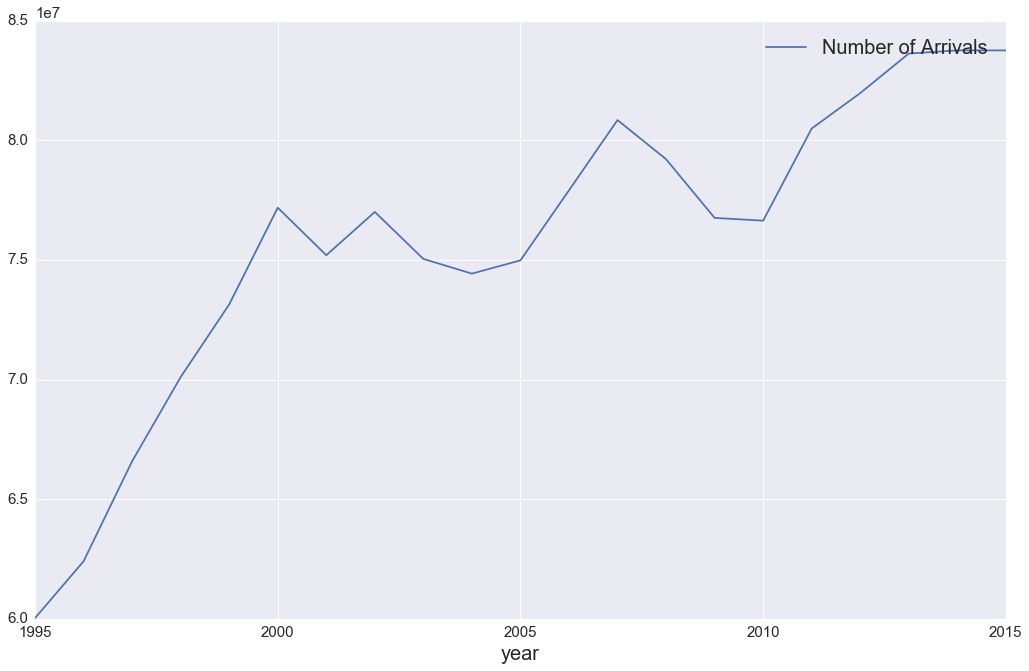

In [27]:
plot_line_chart("France","INT_ARVL")
plt.xlabel('year')
plt.legend().get_texts()[0].set_text('Number of Arrivals')
plt.tight_layout()

The line chart shows that the number grew dramatically from 1995 to 2000, after which experienced a slightly wave until 2005. Then it showed a strong increasing to 2007. However, after 2007 it experienced a nearly 10 percent decrease until the year of 2010. The reason may be the world financial crisis. Then the number of arrivals rose again.

### 6.5 the relationship among GDP,expenditures and receipts.

questions:

1.What are the proportions of expenditures to GDP and receipts to GDP?

2.Does expenditures relate to receipts?

In [28]:
country_data["proportions of expenditures to GDP"]=country_data["INT_XPND"]/country_data["GDP"]*100
country_data["proportions of receipts to GDP"]=country_data["INT_RCPT"]/country_data["GDP"]*100
country_data.head()

E:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,country,date,INT_RCPT,GDP,INT_ARVL,INT_DPRT,INT_XPND,proportions of expenditures to GDP,proportions of receipts to GDP
date,,,,,,,,,
1995-01-01,China,1995-01-01,8730000000.00,732032045217.77,20034000.00,4520000.00,3688000000.00,0.50,1.19
1995-01-01,France,1995-01-01,31295000000.00,1609892232882.11,60033000.00,18686000.00,20699000000.00,1.29,1.94
1995-01-01,India,1995-01-01,2582000000.00,366600193391.35,2124000.00,3056000.00,996000000.00,0.27,0.70
1995-01-01,Australia,1995-01-01,11915000000.00,367949212949.21,3726000.00,2519000.00,7260000000.00,1.97,3.24
1995-01-01,Japan,1995-01-01,4894000000.00,5333925511058.95,3345000.00,15298000.00,46966000000.00,0.88,0.09


proportions of expenditures to GDP 

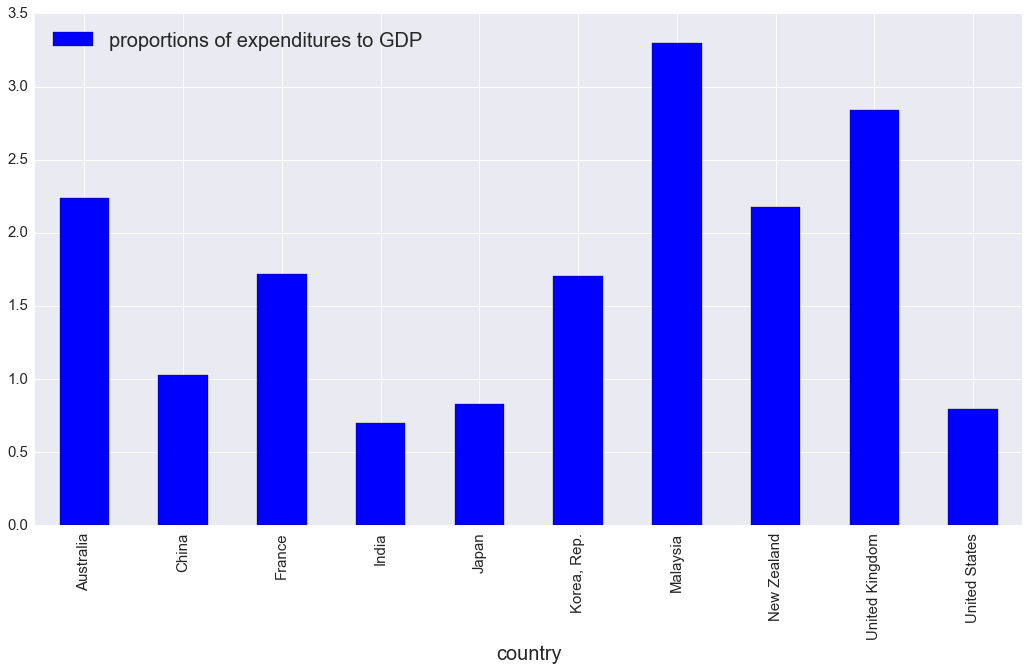

In [29]:
_=plot_bar_chart("proportions of expenditures to GDP")
plt.tight_layout()

As shown in the bar chart, Malaysia has the largest amount of proportion. It means that traveling to other country is important in their expenditures. Besides, the US takes the second last position. The reason may be US the a well developed country, GDP of the country is quite high so that the proportion is not large.

proportions of receipts to GDP

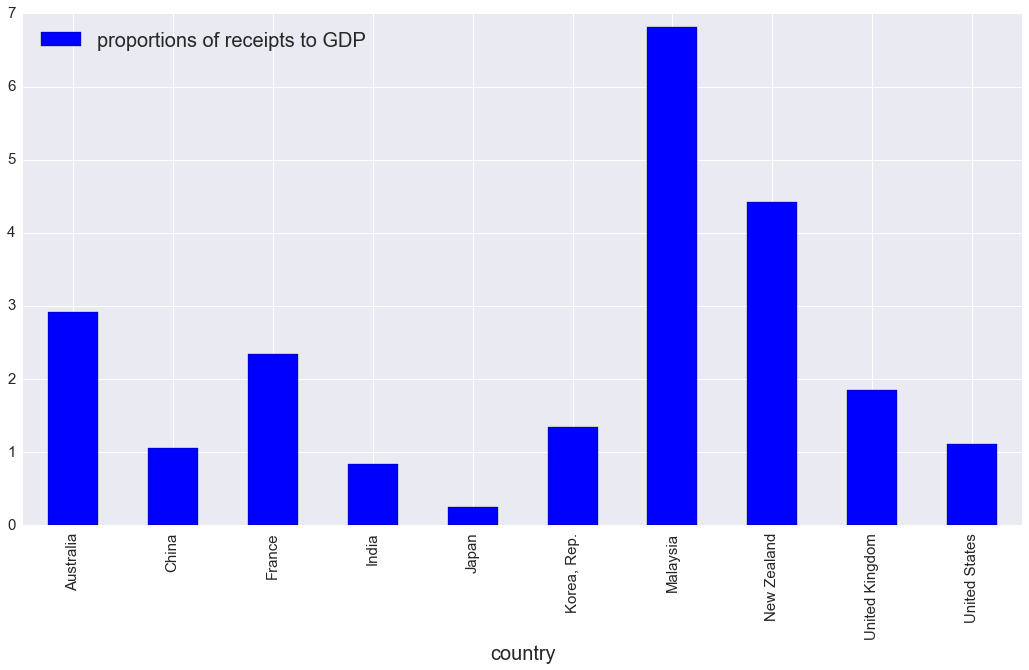

In [30]:
_=plot_bar_chart("proportions of receipts to GDP")
plt.tight_layout()

As shown in the bar chart, Malaysia has the largest amount of proportion. It tells us that tourism is a important part of the country's income. It is worth mentioning that New Zealand takes the second position among the countries, the proportion of which is one third higher than than of Australia.

Does expenditures relate to receipts?

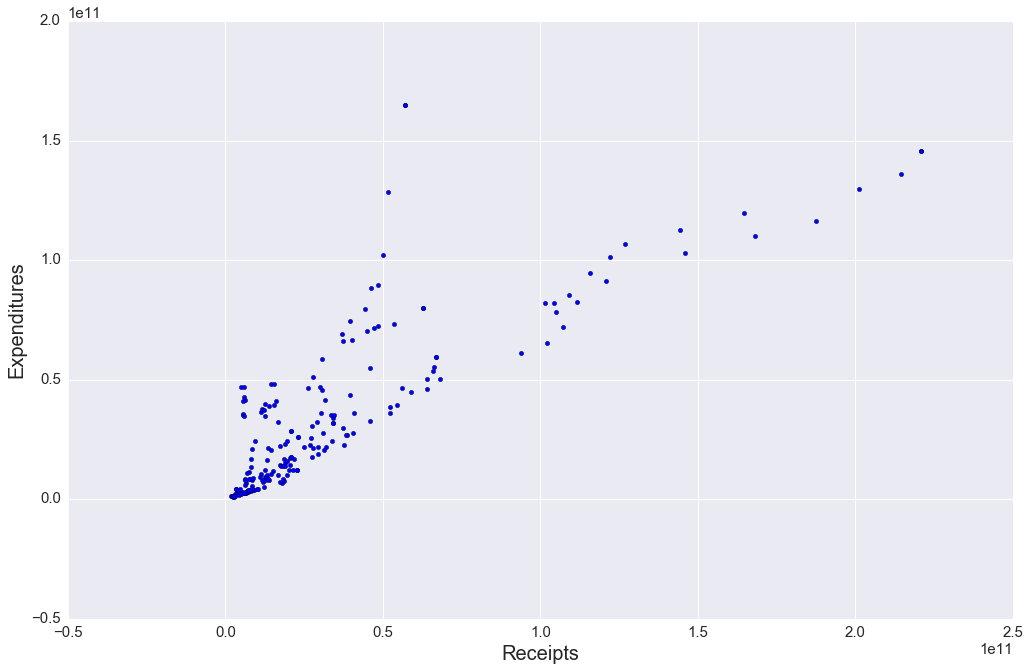

In [31]:
_=plt.scatter(country_data['INT_RCPT'],country_data['INT_XPND'])
plt.xlabel('Receipts')
plt.ylabel('Expenditures')
plt.tight_layout()

It seems that there is liner relationship between these two features. To find out the real answer, I will do the predictive model in next chapter.

## 7.Predictive Modelling

As I mentioned in last chapter, It is significant to find out the relationship between expenditures and receipts, and make predictive models by regression model and KDD model

### 7.1 regression model

In [32]:
import statsmodels.formula.api as smf

In last chapter, I choose some countries to analysis data. However, to make the regression model of the world tourism, I will not use the diminished dataset. I will use the dataset which contains data of the world.

Firstly, I will draw a graph to see the trend.

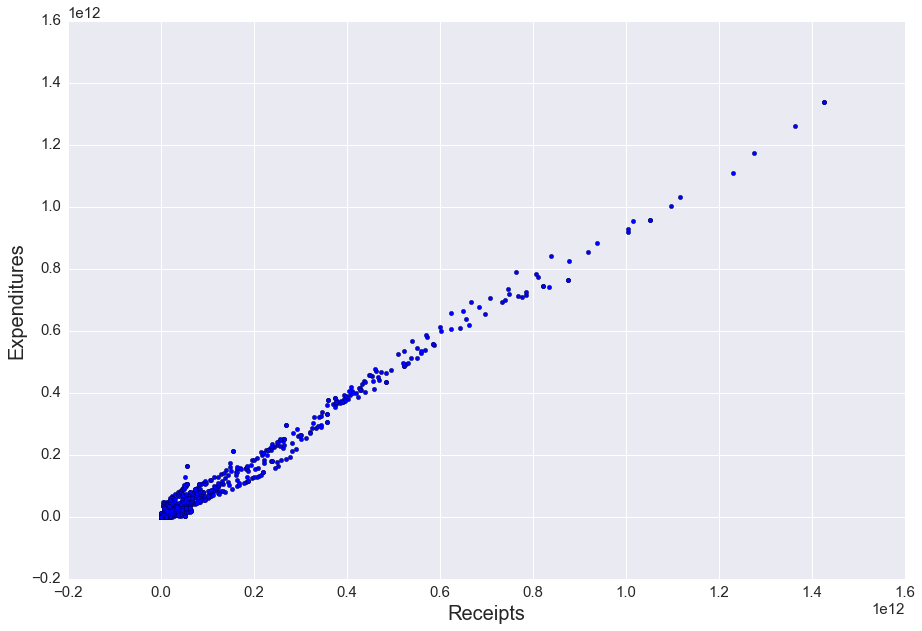

In [33]:
plt.scatter(df['INT_RCPT'],df['INT_XPND'])
plt.xlabel('Receipts')
plt.ylabel('Expenditures')

It seems that the graph is liner regression. I will give my initial model.

My initial model is y = 0.93 * x

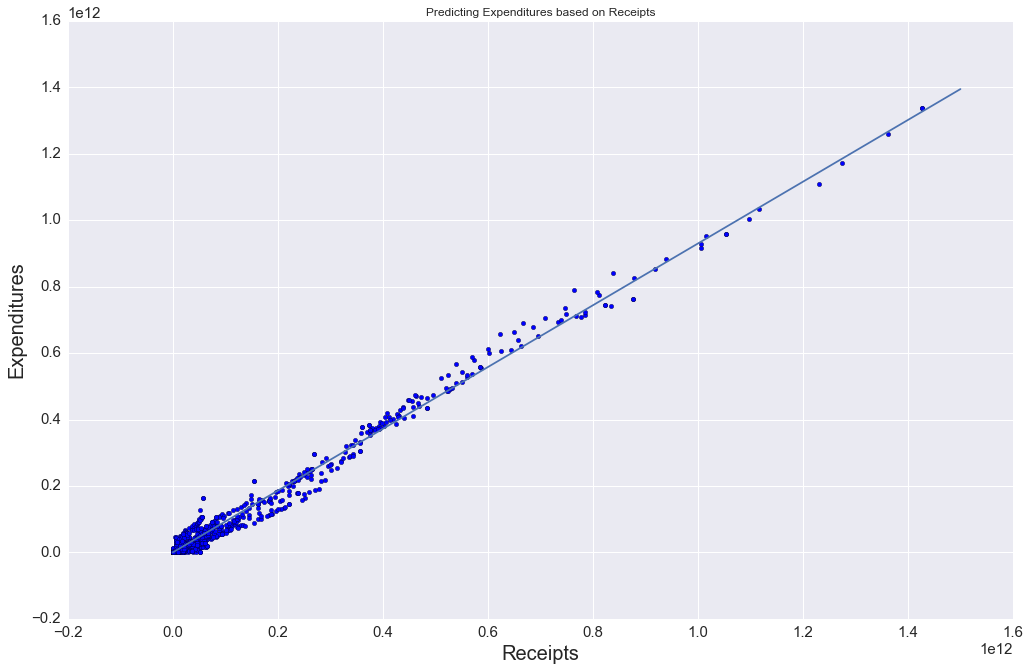

In [34]:
plt.scatter(df['INT_RCPT'],df['INT_XPND'])
b0, b1 = (0, 0.93)
plt.title("Predicting Expenditures based on Receipts")
plt.plot([0,1.5*10**12], [b0, b0+b1*1.5*10**12])
plt.xlabel('Receipts')
plt.ylabel('Expenditures')
plt.tight_layout()

Now that we see that there are relationships in the data and in particular between the Receipts as a predictor and Expenditures as a response variable, we can generate a regression model, visualise it, and evaluate its reliability as follows:

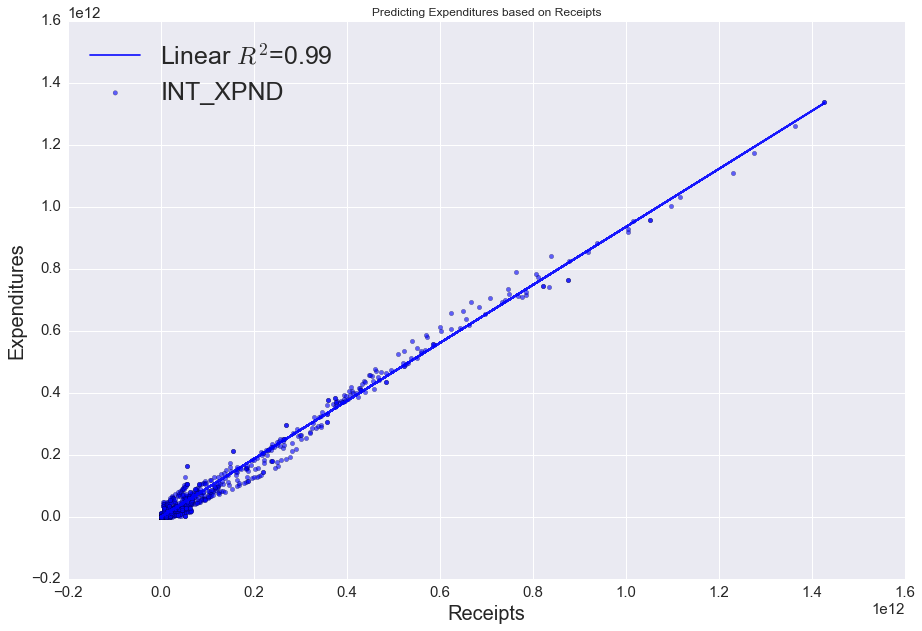

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INT_XPND   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.078e+05
Date:                Sun, 24 Apr 2016   Prob (F-statistic):               0.00
Time:                        19:27:50   Log-Likelihood:            -1.2715e+05
No. Observations:                5208   AIC:                         2.543e+05
Df Residuals:                    5206   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6.158e+08   1.38e+08     -4.457      0.000     -8.87e+08 -3.45e+08
INT_RCPT       0.9356      0.001    712.579      0.000         0.933     0.938
==============================================================================
Omnibus:                     1588.818   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125271.762
Skew:                           0.523   Prob(JB):                         0.00
Kurtosis:                      27.004   Cond. No.                     1.08e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#generate the model which uses the Receipts to predict the Expenditures - the ols() return the generated model
mod = smf.ols(formula='INT_XPND ~ 1 + INT_RCPT', data=df.dropna()).fit()

#plot the actual data
plt.scatter(df['INT_RCPT'],df['INT_XPND'],alpha=0.6)

plt.xlabel('Receipts')
plt.ylabel('Expenditures')

#render the regression line by predicting the ys using the generated model from above
plt.plot(df['INT_RCPT'], mod.predict(df), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting Expenditures based on Receipts")

#display the model statistics describing the goodness of fit
plt.show()
mod.summary()

### 7.2 kNN model

We will try to model student expenditures based on Receipts

In [36]:
from sklearn import neighbors

In [37]:
X = df['INT_XPND']
X = np.reshape(X, (len(df['INT_XPND']), 1))
y = df['INT_RCPT']
y = np.reshape(y, (len(df['INT_RCPT']), 1))

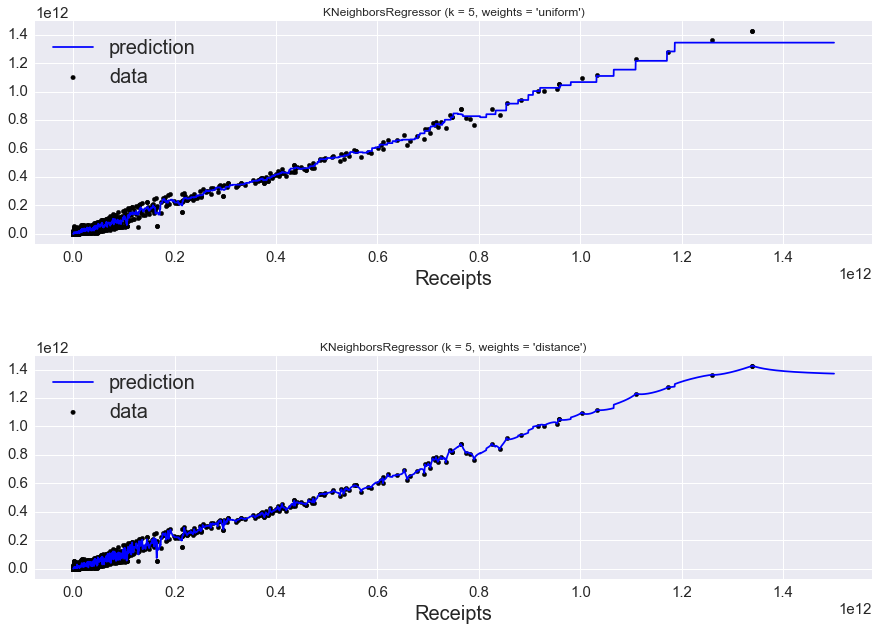

In [38]:
# Fit regression model
x = np.linspace(0, 1.5*10**12, 5000)[:, np.newaxis]
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X, y).predict(x)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(x, y_hat, c='b', label='prediction')
    plt.axis('tight')
    plt.xlabel('Receipts')
    #plt.ylabel('Total')
    plt.legend(loc='upper left')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.subplots_adjust( hspace=0.5)
    
plt.show()

We will now see how we can empirically determine what is the best value of k for this dataset.

For this, we will use the RMSE and the R^2 metrics.
First of all, let's train the model:

In [39]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
mod = knn.fit(X, y)

Next, we will create and array of exam values with a very small amount of jitter (otherwise the nans are returned).

In [40]:
x = np.reshape(df['INT_RCPT'].values, (len(df['INT_RCPT']), 1)) + 0.001

Then we create the predicted values: 

In [41]:
y_hat = mod.predict(x)

Next, define a method that calculates the R^2 and the RMSE measures:

In [42]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

In [43]:
calculate_regression_goodness_of_fit(y, y_hat)

(1.086067481601003, 7901783083.221179)

we want to re-train the model with different values of k, beginning with 2 to the size of the dataset, and inspect the effect that varying k has on the accuracy measures.

In [44]:
rmse_arr = []

for k in range(2, 10):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)

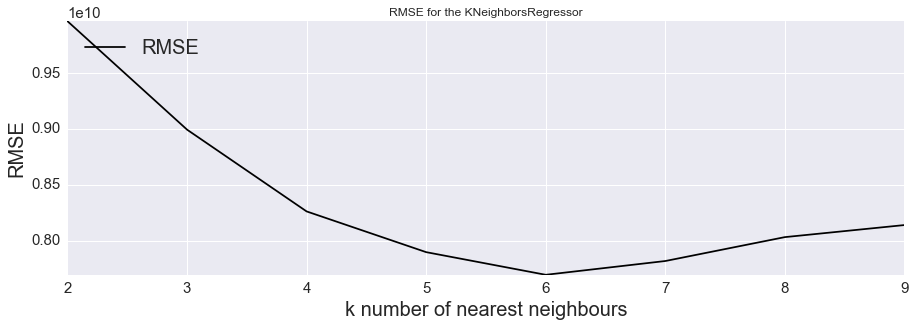

In [45]:
plt.subplot(2, 1, 2)
plt.plot(range(2, 10), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")

RMSE shows that the best option for k is 6.

### 7.3 Conclusion

The result shows that there is a strong liner relationship between receipts and expenditures. It can be explained by economic theory. One person's consumption can increase another person's income. In this topic, travel is another way of consumption. International tourism is trade between different countries.

In [46]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check');
});

<IPython.core.display.Javascript object>